In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [370]:
df = pd.read_csv('qoura_train.csv')

In [371]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
65957,65957,114394,114395,What are pros and cons of 1 monitor (Dell’s P4...,What are the pros and cons of the Dell monitor...,0
378261,378261,371811,509650,Is it more important to have a great paying jo...,What are some great jobs that pay over 50k sta...,0
358336,358336,95365,487801,"What does ""Active k minutes ago"" mean on Faceb...",What is the difference between active 1 hour a...,0
386671,386671,518909,518910,Why is included angle in V belt taken 30°- 40°?,Why did Robin of Locksley take Sebald to his h...,0
124981,124981,201719,7334,Why are most answers on Quora unnecessarily long?,Why are most Quora answers so long?,1
77015,77015,131575,131576,How can you intuitively explain the fact that ...,Does shear stress generate a reaction?,0
99475,99475,30274,1893,Why is Saltwater Taffy candy imported in Poland?,Why is Saltwater taffy candy imported in Austr...,1
276689,276689,370365,395674,Why don't most of the Hell's Kitchen winners f...,Why do the participants of Hell's Kitchen make...,0
306280,306280,429765,429766,What is the best way to learn Android Studio f...,What is the best way to learn Android Studio?,1
202327,202327,304589,304590,Why is pool easier than snooker?,Is pool or snooker easier?,0


In [372]:
df.duplicated().sum()

0

In [373]:
df['qid1'].duplicated().value_counts()

qid1
False    290654
True     113636
Name: count, dtype: int64

In [374]:
df['qid2'].duplicated().value_counts()

qid2
False    299364
True     104926
Name: count, dtype: int64

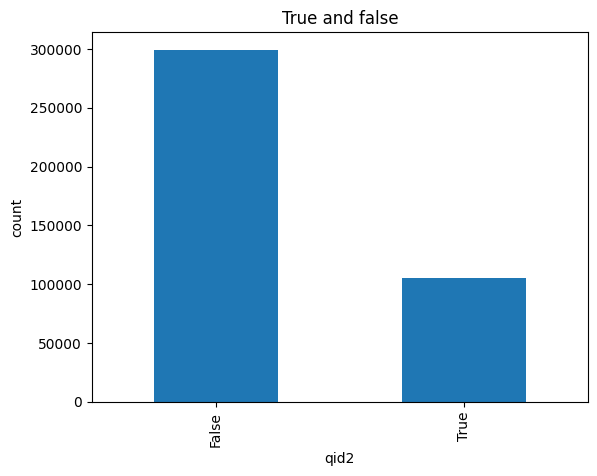

In [375]:
df['qid2'].duplicated().value_counts().plot(kind='bar', ylabel='count', title='True and false');

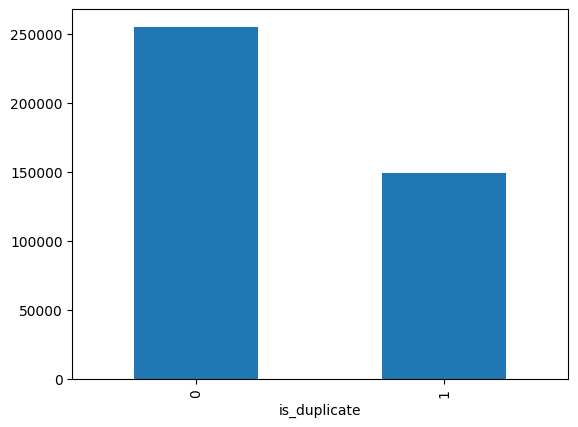

In [376]:
df['is_duplicate'].value_counts().plot(kind='bar');

In [377]:
percentage_df = pd.DataFrame( df['is_duplicate'].value_counts()/df['is_duplicate'].count() * 100)

<Axes: xlabel='is_duplicate'>

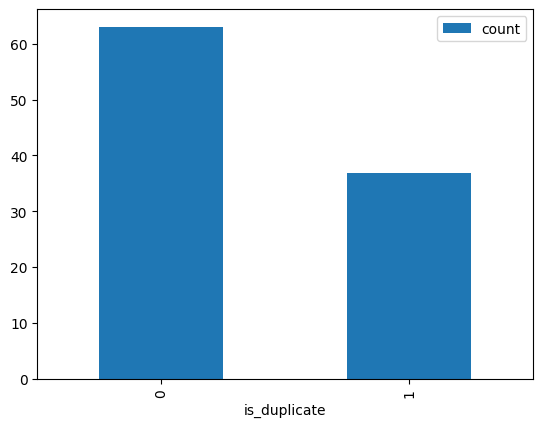

In [378]:
percentage_df.plot(kind='bar')

In [379]:
qid = pd.Series(df['qid1'].to_list() + df['qid2'].to_list())

In [380]:
np.unique(qid).shape

(537933,)

In [381]:
x = qid.value_counts()>1

In [382]:
x[x].shape

(111780,)

In [383]:
qid.value_counts().values

array([157, 120, 111, ...,   1,   1,   1])

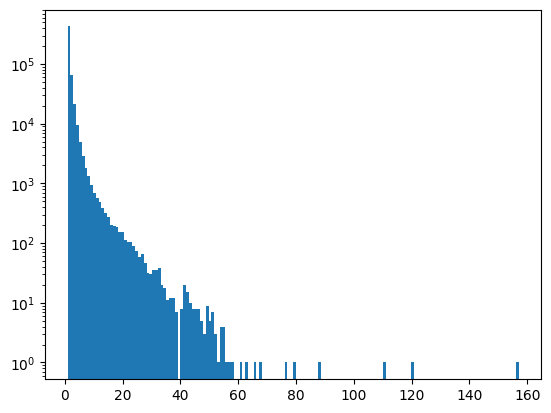

In [384]:
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()

In [385]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [386]:
new_df = df.dropna()

In [387]:
ddf = new_df.sample(3000)

In [388]:
questions = list(list(ddf['question1']) + list(ddf['question2']))

In [389]:
questions

['What is a stupid question?',
 'Which is the best camera phone for 13000?',
 "After I stand up very fast I get a very dizzy wired feeling. it's the most euphoric amazing feeling in the world for 5 seconds. What is this?",
 'What does it mean to be a Goldwater Republican?',
 'What not to do in BITS Pilani?',
 'Which is institution is better among D.T.U and IIIIT-D for Computer Science?',
 'What is One Rank, One Pension?',
 'What is M.A.D?',
 'Where can I find the largest range of wedding dresses, formal dresses and evening wear on the Gold Coast?',
 "What's a good book to understand how money flows in an economy and Inflation?",
 'How do I improve my pronunciation in English?',
 'What are movies that make you think deeply and/or completely blow your mind?',
 'Is there really such a thing as a coincidence?',
 'Who should I follow on Instagram?',
 'How many ways are there to learn new things?',
 'Why is glass transparent?',
 'Why is there no major American political party representing th

In [390]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3000)


In [391]:
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [392]:
temp_df1 = pd.DataFrame(q1_arr, index= ddf.index)

In [393]:
temp_df2 = pd.DataFrame(q2_arr, index= ddf.index)

In [394]:
temp_df = pd.concat([temp_df1, temp_df2], axis=1)

In [395]:
ddf

,id,qid1,qid2,question1,question2,is_duplicate
99047,99047,164493,164494,What is a stupid question?,What stupid question may twins come across?,0
11865,11865,22896,22897,Which is the best camera phone for 13000?,India: What is the best phone to buy between (...,0
225417,225417,333752,49602,After I stand up very fast I get a very dizzy ...,Why when I suddenly stand up does my vision go...,0
182986,182986,279934,279935,What does it mean to be a Goldwater Republican?,Will a Trump presidency mean the end of the Re...,0
250741,250741,364705,190950,What not to do in BITS Pilani?,What do IITians think of BITS Pilani?,0
...,...,...,...,...,...,...
175194,175194,26094,28647,What is primary purpose of life?,Wanna ask someone please. What is life? And wh...,1
338560,338560,143560,129282,What countries have the best practices and edu...,Which countries have the best education system...,1
316487,316487,441544,441545,How much do I need to score in NEET 2 to get a...,What score should I get in NEET 2 to get a sea...,1
400590,400590,468908,98657,What are your favorite fantasy books?,What are your favorite fantasy novels? Why?,1


In [396]:
temp_df['is_duplicate'] = ddf['is_duplicate']

In [397]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
99047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11865,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
225417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
250741,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
338560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
316487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
400590,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [398]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [399]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()


In [400]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [401]:
y_pred = rf.predict(X_test)

In [402]:
from sklearn.metrics import accuracy_score

In [403]:
accuracy_score(y_test, y_pred)

0.6866666666666666